In [ ]:
%load_ext autoreload
%autoreload 2
import os
print(os.getcwd())
to_run = True
if to_run:
    os.chdir('..')
    to_run = False
print(os.getcwd())

# Group Details

**Group ID: 17**

**Group name: Mandatory Assignment 17**

**Group members that contributed to the assignment (full name): Emil Vedel Thage, Niels Dam Fisker and Oscar Koch-Müller**


# Part 1


Consider the following activities extracted from the Dreyers log introduced and examined in the paper The Analysis of a Real Life Declarative Process:

```python
Fill out application
Architect Review
Lawyer Review
Reject
Applicant informed
Change phase to Abort
Change Phase to Payout
First payment
Undo payment 
Change Phase to End Report
Account number changed
Approve changed account 
Execute abandon
Change phase to Abandon
```


## Task 1


Using these activities, model a simple workflow of an application process as a Petri net. It does not need to follow exactly the process as described in the paper and you may add additional details yourself, but you should ensure that your process captures at least the following rules:

1. Fill out application should always be the first event of the case. 
2. Lawyer Review and Architect Review can not occur unless Fill out application happened before.
3. Lawyer Review and Architect Review should never occur together.
4. Reject should always eventually be followed by Applicant informed and Change phase to Abort.
5. First payment should only occur once, unless Undo payment is executed afterwards, in which case it may be repeated once more.
6. If Account number changed happens, then afterwards Approve changed account needs to be executed and we can no longer execute First payment until the approval has happened.
7. Change Phase to Payout should always eventually be followed by First payment.
8. After Change Phase to Payout has happened, Change Phase to End Report should not happen before we do First Payment. If Change Phase to Payout did not happen then Change Phase to End Report is not restricted by First payment.

Create a copy of your Petrinet with one additional rule:

9. Execute Abandon may happen at any time, after it is executed only Change phase to Abandon may happen.

None
None


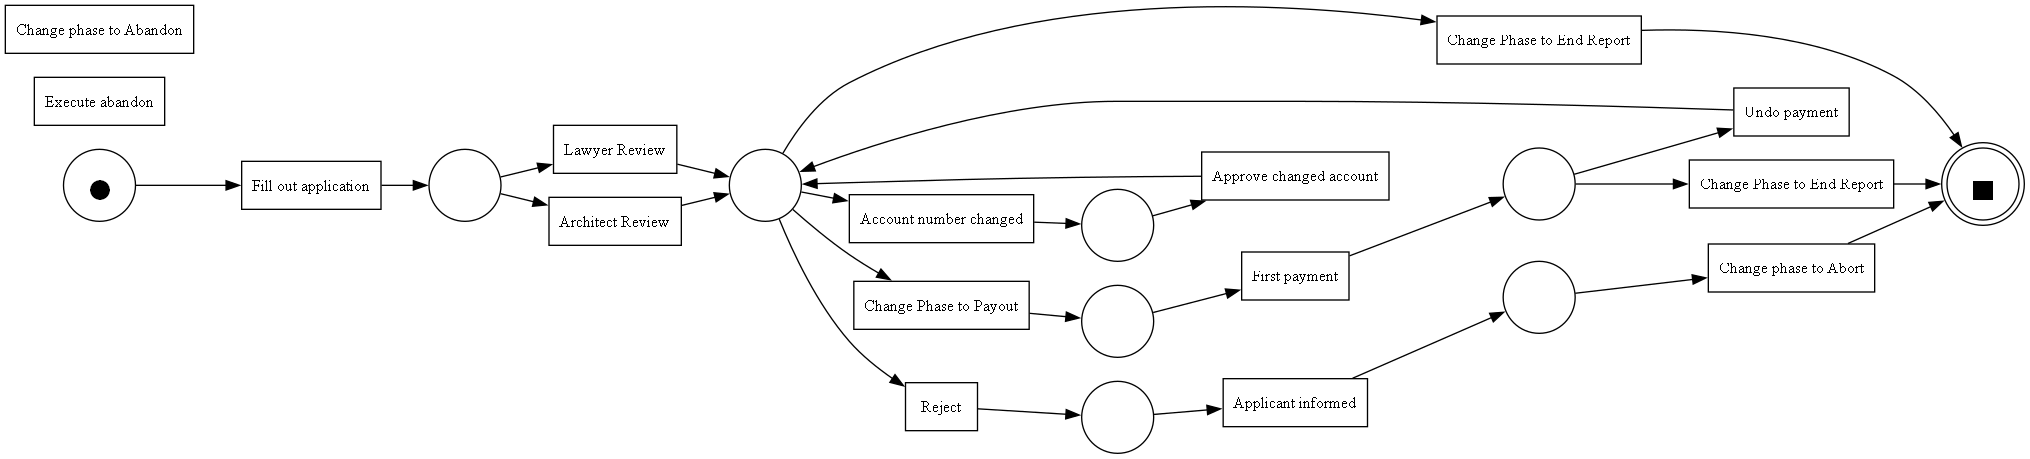

In [ ]:
import pandas as pd
import pm4py
from pm4py.objects.petri_net.obj import PetriNet, Marking
from pm4py.objects.petri_net.utils import petri_utils
from pm4py.visualization.petri_net import visualizer as pn_visualizer

# Create a Petri net
net = PetriNet("petri_net_rules_1_to_8")

# Create transitions
t_fill_out_application = PetriNet.Transition("t_fill_out_application", "Fill out application")
t_architect_review = PetriNet.Transition("t_architect_review", "Architect Review")
t_lawyer_review = PetriNet.Transition("t_lawyer_review", "Lawyer Review")
t_reject = PetriNet.Transition("t_reject", "Reject")
t_applicant_informed = PetriNet.Transition("t_applicant_informed", "Applicant informed")
t_change_phase_to_abort = PetriNet.Transition("t_change_phase_to_abort", "Change phase to Abort")
t_change_phase_to_payout = PetriNet.Transition("t_change_phase_to_payout", "Change Phase to Payout")
t_first_payment = PetriNet.Transition("t_first_payment", "First payment")
t_undo_payment = PetriNet.Transition("t_undo_payment", "Undo payment")
t_change_phase_to_end_report = PetriNet.Transition("t_change_phase_to_end_report", "Change Phase to End Report")
t_change_phase_to_end_report2 = PetriNet.Transition("t_change_phase_to_end_report", "Change Phase to End Report")

t_account_number_changed = PetriNet.Transition("t_account_number_changed", "Account number changed")
t_approve_changed_account = PetriNet.Transition("t_approve_changed_account", "Approve changed account")
t_execute_abandon = PetriNet.Transition("t_execute_abandon", "Execute abandon")
t_change_phase_to_abandon = PetriNet.Transition("t_change_phase_to_abandon", "Change phase to Abandon")

net.transitions.add(t_fill_out_application)
net.transitions.add(t_architect_review)
net.transitions.add(t_lawyer_review)
net.transitions.add(t_reject)
net.transitions.add(t_applicant_informed)
net.transitions.add(t_change_phase_to_abort)
net.transitions.add(t_change_phase_to_payout)
net.transitions.add(t_first_payment)
net.transitions.add(t_undo_payment)
net.transitions.add(t_change_phase_to_end_report)
net.transitions.add(t_change_phase_to_end_report2)
net.transitions.add(t_account_number_changed)
net.transitions.add(t_approve_changed_account)
net.transitions.add(t_execute_abandon)
net.transitions.add(t_change_phase_to_abandon)

# Create places
p1 = PetriNet.Place("p1")
p2 = PetriNet.Place("p2")
p3 = PetriNet.Place("p3")
p4 = PetriNet.Place("p4")
p5 = PetriNet.Place("p5")
p6 = PetriNet.Place("p6")
p7 = PetriNet.Place("p7")
p8 = PetriNet.Place("p8")
p9 = PetriNet.Place("p9")


net.places.add(p1)
net.places.add(p2)
net.places.add(p3)
net.places.add(p4)
net.places.add(p5)
net.places.add(p6)
net.places.add(p7)
net.places.add(p8)
net.places.add(p9)

# Create arcs
petri_utils.add_arc_from_to(p1, t_fill_out_application, net)
petri_utils.add_arc_from_to(t_fill_out_application, p3, net)
petri_utils.add_arc_from_to(p3, t_lawyer_review, net)
petri_utils.add_arc_from_to(p3, t_architect_review, net)
petri_utils.add_arc_from_to(t_architect_review, p2, net)
petri_utils.add_arc_from_to(t_lawyer_review, p2, net)
petri_utils.add_arc_from_to(t_reject, p5, net)
petri_utils.add_arc_from_to(p5, t_applicant_informed, net)
petri_utils.add_arc_from_to(t_applicant_informed, p6, net)
petri_utils.add_arc_from_to(p6, t_change_phase_to_abort, net)
petri_utils.add_arc_from_to(p2, t_reject, net)
petri_utils.add_arc_from_to(p2, t_change_phase_to_payout, net)
petri_utils.add_arc_from_to(t_first_payment, p4, net)
petri_utils.add_arc_from_to(p4, t_undo_payment, net)
petri_utils.add_arc_from_to(t_undo_payment, p2, net)
petri_utils.add_arc_from_to(p2, t_account_number_changed, net)
petri_utils.add_arc_from_to(t_account_number_changed, p7, net)
petri_utils.add_arc_from_to(p7, t_approve_changed_account, net)
petri_utils.add_arc_from_to(t_approve_changed_account, p2, net)
petri_utils.add_arc_from_to(t_change_phase_to_payout, p8, net)
petri_utils.add_arc_from_to(p8, t_first_payment, net)
petri_utils.add_arc_from_to(t_change_phase_to_abort, p9, net)

petri_utils.add_arc_from_to(p2, t_change_phase_to_end_report, net)
petri_utils.add_arc_from_to(p4, t_change_phase_to_end_report2, net)
petri_utils.add_arc_from_to(t_change_phase_to_end_report2, p9, net)
petri_utils.add_arc_from_to(t_change_phase_to_end_report, p9, net)


#Add rules 2-8 to the Petri net
# TODO


# Initial and final markings
# TODO: update as needed.
initial_marking = Marking()
initial_marking[p1] = 1

final_marking = Marking()
final_marking[p9] = 1

# Visualize the Petri net
gviz = pn_visualizer.apply(net, initial_marking, final_marking)
pn_visualizer.view(gviz)

None
None


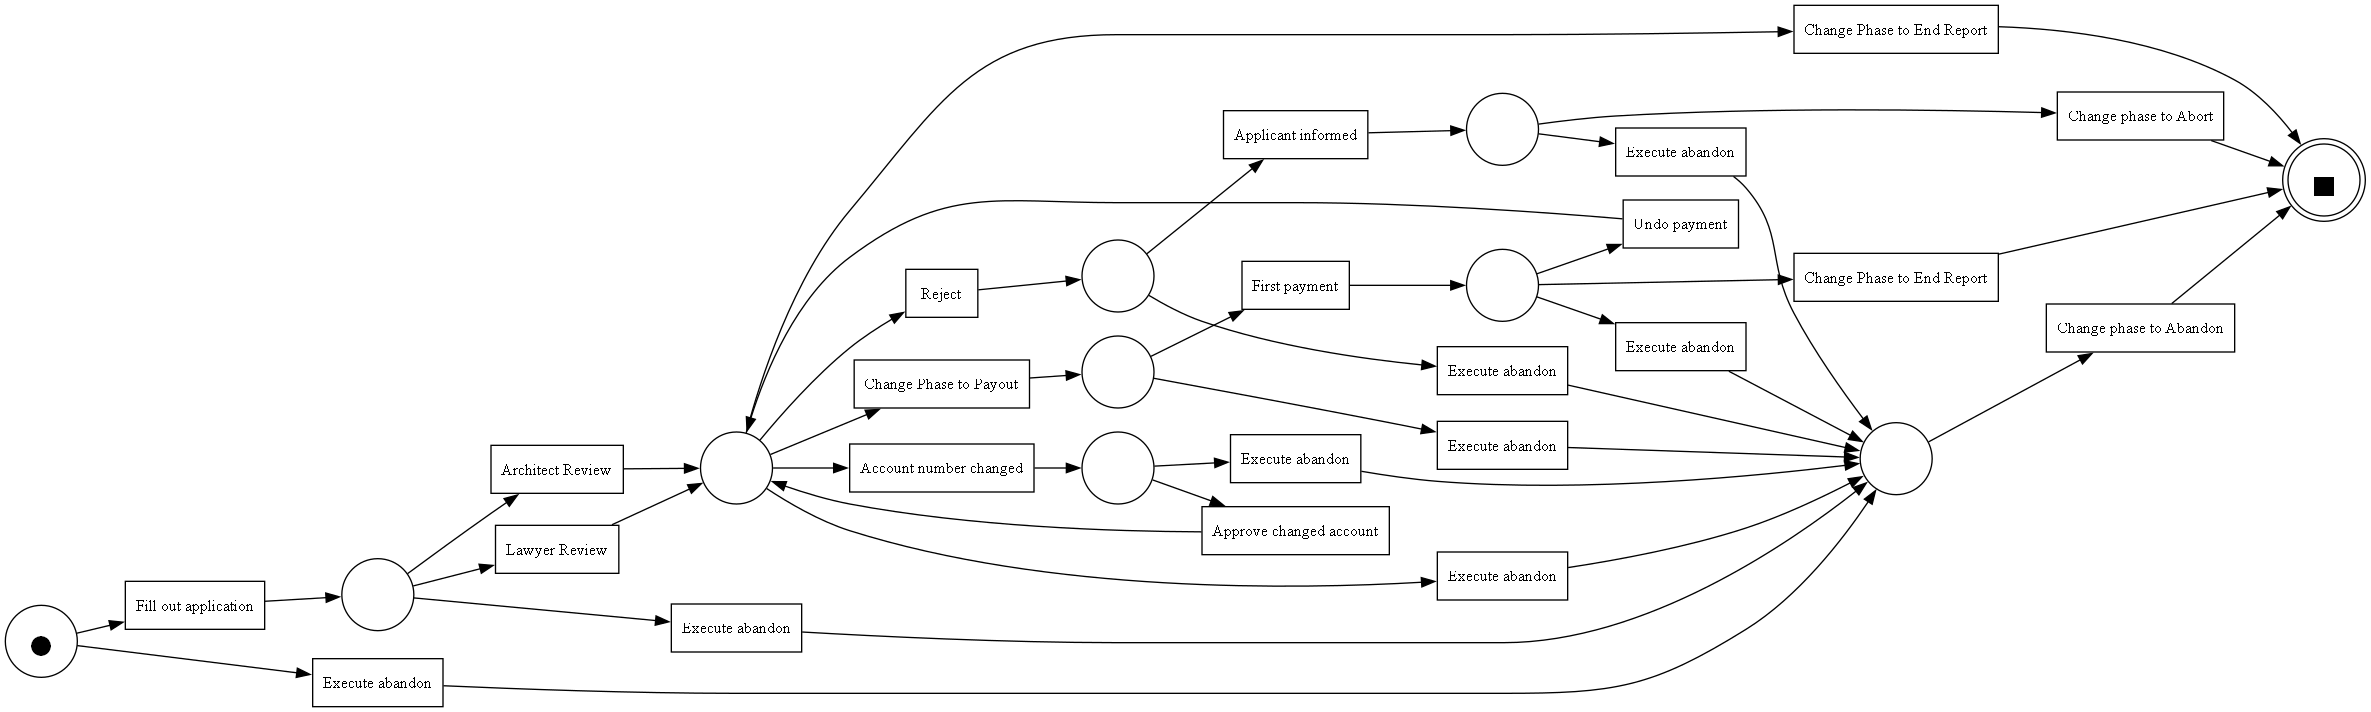

In [ ]:
#Add rule 9 to the Petri net
t_execute_abandon2 = PetriNet.Transition("t_execute_abandon", "Execute abandon")
t_execute_abandon3 = PetriNet.Transition("t_execute_abandon", "Execute abandon")
t_execute_abandon4 = PetriNet.Transition("t_execute_abandon", "Execute abandon")
t_execute_abandon5 = PetriNet.Transition("t_execute_abandon", "Execute abandon")
t_execute_abandon6 = PetriNet.Transition("t_execute_abandon", "Execute abandon")
t_execute_abandon7 = PetriNet.Transition("t_execute_abandon", "Execute abandon")
t_execute_abandon8 = PetriNet.Transition("t_execute_abandon", "Execute abandon")


net.transitions.add(t_execute_abandon2)
net.transitions.add(t_execute_abandon3)
net.transitions.add(t_execute_abandon4)
net.transitions.add(t_execute_abandon5)
net.transitions.add(t_execute_abandon6)
net.transitions.add(t_execute_abandon7)
net.transitions.add(t_execute_abandon8)

p10 = PetriNet.Place("p10")
net.places.add(p10)

petri_utils.add_arc_from_to(p1, t_execute_abandon, net)
petri_utils.add_arc_from_to(p2, t_execute_abandon2, net)
petri_utils.add_arc_from_to(p3, t_execute_abandon3, net)
petri_utils.add_arc_from_to(p4, t_execute_abandon4, net)
petri_utils.add_arc_from_to(p5, t_execute_abandon5, net)
petri_utils.add_arc_from_to(p6, t_execute_abandon6, net)
petri_utils.add_arc_from_to(p7, t_execute_abandon7, net)
petri_utils.add_arc_from_to(p8, t_execute_abandon8, net)

petri_utils.add_arc_from_to(t_execute_abandon, p10, net)
petri_utils.add_arc_from_to(t_execute_abandon2, p10, net)
petri_utils.add_arc_from_to(t_execute_abandon3, p10, net)
petri_utils.add_arc_from_to(t_execute_abandon4, p10, net)
petri_utils.add_arc_from_to(t_execute_abandon5, p10, net)
petri_utils.add_arc_from_to(t_execute_abandon6, p10, net)
petri_utils.add_arc_from_to(t_execute_abandon7, p10, net)
petri_utils.add_arc_from_to(t_execute_abandon8, p10, net)

petri_utils.add_arc_from_to(p10, t_change_phase_to_abandon, net)
petri_utils.add_arc_from_to(t_change_phase_to_abandon, p9, net)



# Visualize the Petri net
gviz = pn_visualizer.apply(net, initial_marking, final_marking)
pn_visualizer.view(gviz)

## Task 2


For each rule describe how the rule is implemented (as a short paragraph for each rule).

For the first 8 rules we are using the first pretri net.

**Rule 1**

Starting from the input place, the only transition that can fire is fill out application and it is therefore always the first event of the case.

**Rule 2**

The only way for a token to reach the place that can enable architect review and lawyer review is by firing fill out application.

**Rule 3**

They can never occur together due to the or split.

**Rule 4**

This is modeled using a simple sequence structure.

**Rule 5**

After firing first payment, the token can either be moved to the end place by firing change phase to end report or it can be moved back where it was earlier (from where it is possible to later fire first payment again) by firing undo payment. This ensures we can only fire first payment again if undo payment is fired.

**Rule 6**

Firing account number changed moves the only token in the net to the place, where approve changed account has to fire next. Since we never have more than 1 token in the net at a time, this means first payment (or any other action) can not happen until approve changed account fires.

**Rule 7**

Change phase to payout is always followed by first payment due to the sequential structure.

**Rule 8**

Since we already established that our net only has 1 token at a time and the sequential relationship from change phase to payout to first payment, it is not possible to fire change phase to end report after change phase to payout and before first payment. It is, however, possible to fire change phase to end report instead of change phase to payout, whereby we ensure that change phase to end report is not restricted by first payment if change phase to payout didn't happen.

**Rule 9**

Now we consider the second petri net.
Since this rule is contradicting other rules such as rule 1 and 4, we've decided that rule 9 has priority over the others. It is implemented by having a execute abandon transition from all places (except the final place). All of these 8 transitions all lead to the same place, from where a sequential relationship ensures change phase to abandon happens next after which the token ends up in the final place.


## Task 3

Answer the following questions and add a short (1 paragraph) argument for your answer:

**Is your Petri net live and/or quasi-live?**
It is quasi-live from the starting marking

**Is your Petri net bounded and/or safe?**
It is one bounded, besause there are no "and" splits, so we don't increase the number of tokens. So the net is safe

**Is your Petri net a WorkFlow net?**
yes, it does become strongly connected, if a transition is added from o to i and i has no incoming arcs, while o has no outgoing arcs.



# Part 2: Modelling Event Patterns as DCR Graphs

## Task 1

Model the rules from part 1 as individual DCR Graphs. (Yielding 9 graphs in total.)  Write a short description for each explaining the semantics. For convenience you may want to use an “other” event in some of your models that represents all events not explicitly mentioned.\
1)\ The condition from fill out application enables everything else.\
2)\ The condition prevents them from happening before we have executed fill out application.\
3)\ The two excluding relations prevents both from happening.\
4)\ The response from reject ensures applicant informed will happen at some point and the next arrow from applicant informed to change phase to abort does the same.\
5)\ Executing one includes the other and excludes itself and the other way around.\
6)\ Account number changed excludes first payment and includes approve changed account while also making it pending due to the response relation. Executing approve changed account then excludes itself again while including first payment.\
7)\ The response relation ensures it.\
8)\ Excluding and inclduing ensures this relation.\
9)\ Executing execute abandon excludes everything but change phase to abandon.

None
None


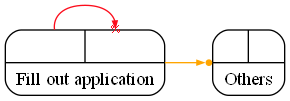

In [ ]:
# Repeat this code block 9 times, once for each pattern

from pm4py.objects.dcr.obj import DcrGraph
graph = DcrGraph()

events = [
    "Fill out application", "Others"
]

for event in events:
    graph.events.add(event)
    graph.labels.add(event)
    graph.label_map[event] = event

for event in graph.events:
    graph.marking.included.add(event)

# Rule 1
graph.conditions["Others"] = {"Fill out application"}
graph.excludes["Fill out application"] = {"Fill out application"}

pm4py.view_dcr(graph)

None
None


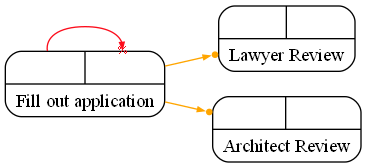

In [ ]:
# Repeat this code block 9 times, once for each pattern

from pm4py.objects.dcr.obj import DcrGraph
graph = DcrGraph()

events = [
    "Fill out application", "Architect Review", "Lawyer Review"
]

for event in events:
    graph.events.add(event)
    graph.labels.add(event)
    graph.label_map[event] = event

for event in graph.events:
    graph.marking.included.add(event)

# Rule 2
graph.conditions["Lawyer Review"] = {"Fill out application"}
graph.conditions["Architect Review"] = {"Fill out application"}
graph.excludes["Fill out application"] = {"Fill out application"}

pm4py.view_dcr(graph)

None
None


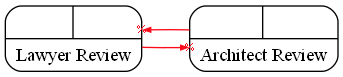

In [ ]:
# Repeat this code block 9 times, once for each pattern

from pm4py.objects.dcr.obj import DcrGraph
graph = DcrGraph()

events = [
     "Architect Review", "Lawyer Review"
]

for event in events:
    graph.events.add(event)
    graph.labels.add(event)
    graph.label_map[event] = event

for event in graph.events:
    graph.marking.included.add(event)

# Rule 3
graph.excludes["Lawyer Review"] = {"Architect Review"}
graph.excludes["Architect Review"] = {"Lawyer Review"}

pm4py.view_dcr(graph)

None
None


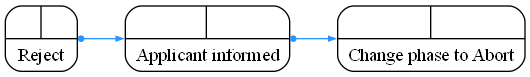

In [ ]:
# Repeat this code block 9 times, once for each pattern

from pm4py.objects.dcr.obj import DcrGraph
graph = DcrGraph()

events = [
    "Reject", "Applicant informed", "Change phase to Abort"
]

for event in events:
    graph.events.add(event)
    graph.labels.add(event)
    graph.label_map[event] = event

for event in graph.events:
    graph.marking.included.add(event)

# Rule 4
graph.responses["Reject"] = {"Applicant informed"}
graph.responses["Applicant informed"] = {"Change phase to Abort"}
pm4py.view_dcr(graph)

None
None


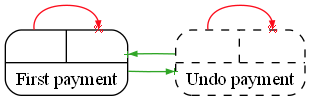

In [ ]:
# Repeat this code block 9 times, once for each pattern

from pm4py.objects.dcr.obj import DcrGraph
graph = DcrGraph()

events = [
    "First payment", "Undo payment"
]

for event in events:
    graph.events.add(event)
    graph.labels.add(event)
    graph.label_map[event] = event


graph.marking.included.add("First payment")

# Rule 5
graph.excludes["First payment"] = {"First payment"}
graph.excludes["Undo payment"] = {"Undo payment"}
graph.includes["Undo payment"] = {"First payment"}
graph.includes["First payment"] = {"Undo payment"}
pm4py.view_dcr(graph)

None
None


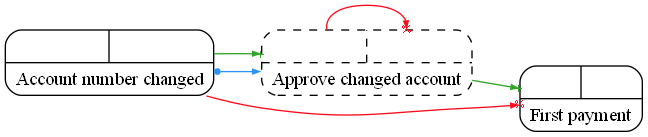

In [ ]:
from pm4py.objects.dcr.obj import DcrGraph
graph = DcrGraph()

events = [
    "First payment",
    "Account number changed", "Approve changed account"
]


for event in events:
    graph.events.add(event)
    graph.labels.add(event)
    graph.label_map[event] = event

for event in graph.events:
    if not event == 'Approve changed account':
        graph.marking.included.add(event)

# Rule 6
graph.responses["Account number changed"] = {"Approve changed account"}
graph.excludes["Account number changed"] = {"First payment"}
graph.includes["Approve changed account"] = {"First payment"}
graph.includes["Account number changed"] = {"Approve changed account"}
graph.excludes["Approve changed account"] = {"Approve changed account"}
pm4py.view_dcr(graph)

None
None


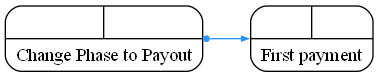

In [ ]:
from pm4py.objects.dcr.obj import DcrGraph
graph = DcrGraph()

events = [
    "Change Phase to Payout", "First payment"
]


for event in events:
    graph.events.add(event)
    graph.labels.add(event)
    graph.label_map[event] = event

for event in graph.events:
    graph.marking.included.add(event)

# Rule 7
graph.responses["Change Phase to Payout"] = {"First payment"}
pm4py.view_dcr(graph)

None
None


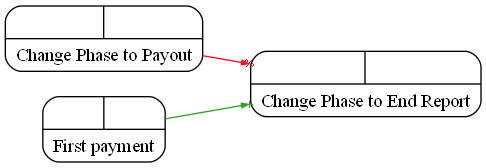

In [ ]:
from pm4py.objects.dcr.obj import DcrGraph
graph = DcrGraph()

events = [
     "Change Phase to Payout", "First payment", "Change Phase to End Report",
]


for event in events:
    graph.events.add(event)
    graph.labels.add(event)
    graph.label_map[event] = event

for event in graph.events:
    graph.marking.included.add(event)

# Rule 8
graph.includes["First payment"] = {"Change Phase to End Report"}
graph.excludes["Change Phase to Payout"] = {"Change Phase to End Report"}
pm4py.view_dcr(graph)

None
None


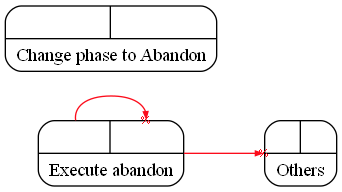

In [ ]:
from pm4py.objects.dcr.obj import DcrGraph
graph = DcrGraph()

events = [
     "Execute abandon", 
    "Change phase to Abandon", "Others"
]


for event in events:
    graph.events.add(event)
    graph.labels.add(event)
    graph.label_map[event] = event

for event in graph.events:
    graph.marking.included.add(event)

# Rule 9
graph.excludes["Execute abandon"] = {"Others", "Execute abandon"}
pm4py.view_dcr(graph)

## Task 2

Combine the separate patterns into a single model.

None
None


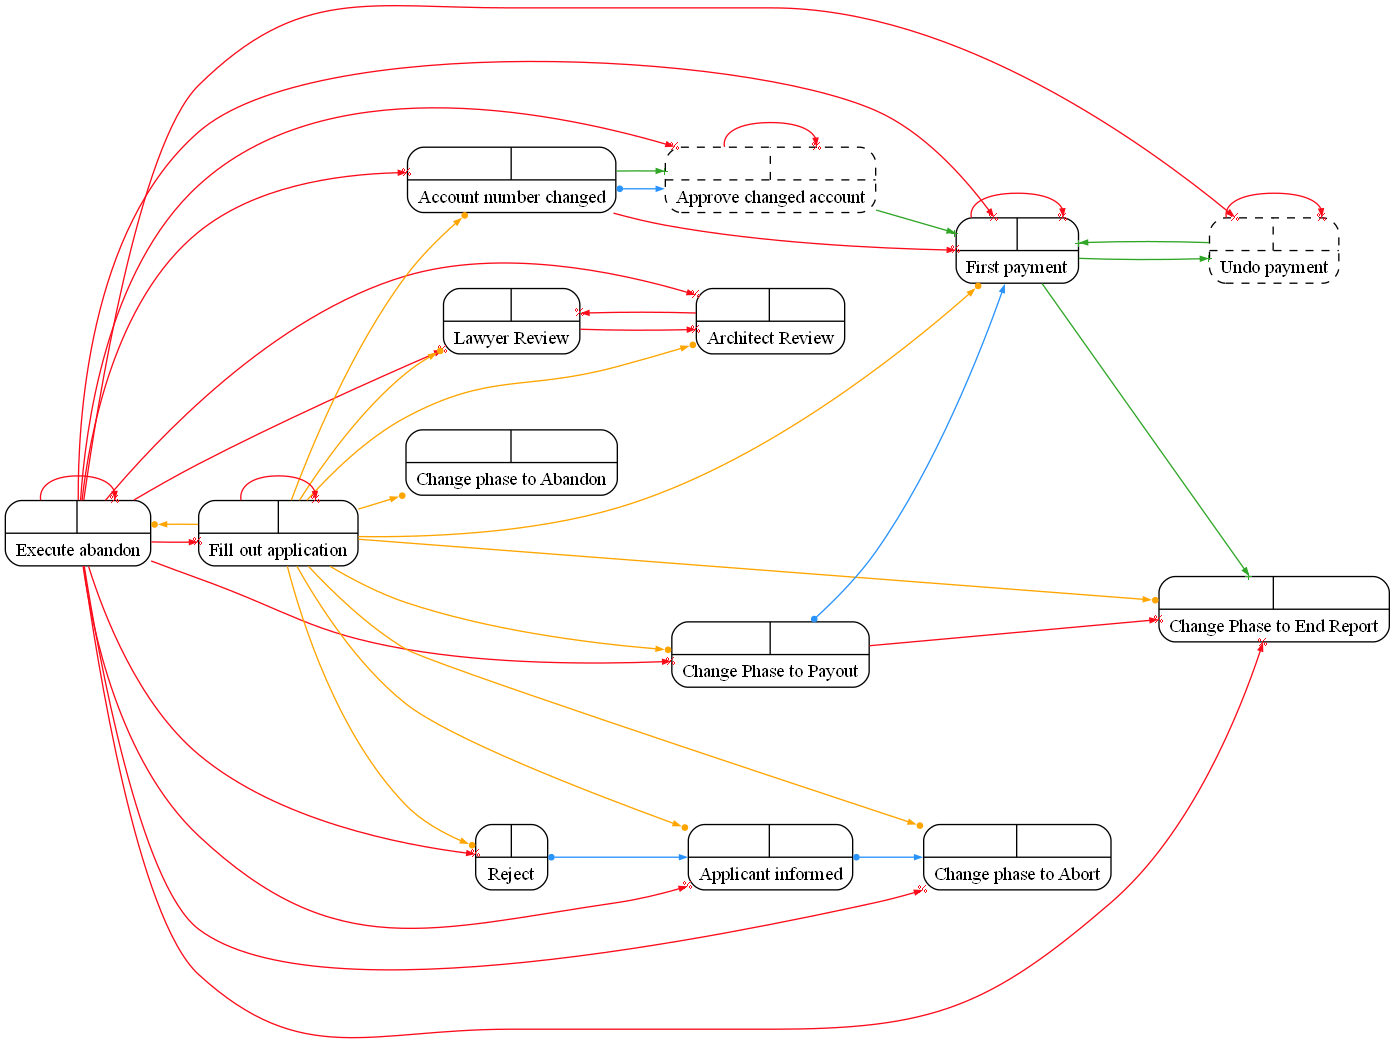

In [ ]:
# Add your code here

from pm4py.objects.dcr.obj import DcrGraph
graph = DcrGraph()

events = [
    "Fill out application", "Architect Review", "Lawyer Review", "Reject", 
    "Applicant informed", "Change phase to Abort", "Change Phase to Payout", 
    "First payment", "Undo payment", "Change Phase to End Report", 
    "Account number changed", "Approve changed account", "Execute abandon", 
    "Change phase to Abandon"
]


for event in events:
    graph.events.add(event)
    graph.labels.add(event)
    graph.label_map[event] = event

for event in graph.events:
    if not event in ['Approve changed account', "Undo payment"]:
        graph.marking.included.add(event)




graph.conditions["Lawyer Review"] = {"Fill out application"}
graph.conditions["Architect Review"] = {"Fill out application"}

for event in graph.events:
    if not event in ["Fill out application", "Undo payment", "Approve changed account"]:
        graph.conditions[event] = {"Fill out application"}

graph.excludes["Execute abandon"] = {"Others", "Execute abandon"}
graph.excludes["Account number changed"] = {"First payment"}
graph.excludes["Approve changed account"] = {"Approve changed account"}
graph.excludes["Lawyer Review"] = {"Architect Review"}
graph.excludes["Architect Review"] = {"Lawyer Review"}
graph.excludes["First payment"] = {"First payment"}
graph.excludes["Undo payment"] = {"Undo payment"}
graph.excludes["Change Phase to Payout"] = {"Change Phase to End Report"}
graph.excludes["Execute abandon"] = {"Fill out application", "Architect Review", "Lawyer Review", "Reject", 
    "Applicant informed", "Change phase to Abort", "Change Phase to Payout", 
    "First payment", "Undo payment", "Change Phase to End Report", 
    "Account number changed", "Approve changed account", "Execute abandon"}
graph.excludes["Fill out application"] = {"Fill out application"}

graph.includes["Undo payment"] = {"First payment"}
graph.includes["First payment"] = {"Undo payment", "Change Phase to End Report"}
graph.includes["Approve changed account"] = {"First payment"}
graph.includes["Account number changed"] = {"Approve changed account"}

graph.responses["Account number changed"] = {"Approve changed account"}
graph.responses["Change Phase to Payout"] = {"First payment"}
graph.responses["Reject"] = {"Applicant informed"}
graph.responses["Applicant informed"] = {"Change phase to Abort"}
pm4py.view_dcr(graph)

## Task 3

Answer the following questions:

**Which relations did you not use in your models?**

We used all of the four fundamental relations. The ones we didn't use can be created from these.

**Could some of the rules have been modelled in more than one way? If so, give one or two examples.**

Yes. One example is rule 6, which we could have modelled by having a milestone from approve changed account to execute first payment and a response from account number changed to approve changed account.

**How does your model differ from the Petri net? Do they exhibit the same language?**

The petri net is in general very restricting as it is imperative and you usually only have a few actions available at a given time. On the other hand the DCR graph is declarative and allows you to execute many different actions at a given time.
They do not exhibit the same language. For example in the DCR graph an accepting trace is <> and that is not an accepting trace in the petri net.

